In [17]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
from dash.dependencies import Input, Output
import numpy as np
import pandas as pd
from datetime import datetime
import dash_bootstrap_components as dbc
import plotly.express as px

In [18]:
def loadData():
    baseURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
    data = pd.read_csv(baseURL) 
    cordonate = data[["Country/Region","Long", "Lat"]]
    data_date = data.drop(["Province/State","Lat","Long"], axis=1)
    return data, cordonate.set_index("Country/Region"), data_date

In [19]:
data, codonate, data_date = loadData()
data.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/30/20  5/1/20  5/2/20  5/3/20  5/4/20  \
0        0        0        0  ...       64      68      72      85      90   
1        0        0        0  ...       31      31      31      31      31   
2        0        0        0  ...      450     453     459     463     465   
3        0        0        0  ...       42      43      44      45      45   
4        0        0        0  ...        2       2       2       2       2   

   5/5/20  5/6/20  5/7/20  5/8/20  5/9/20  
0      95     104     106     109     115  
1      31      31      31      31      31  
2     470     476     483     488     494  
3      46      46      47      47      48  
4       2       2       2       2       2  

[5 rows x 113 columns]

In [8]:
data_date.head()

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0    Afghanistan        0        0        0        0        0        0   
1        Albania        0        0        0        0        0        0   
2        Algeria        0        0        0        0        0        0   
3        Andorra        0        0        0        0        0        0   
4         Angola        0        0        0        0        0        0   

   1/28/20  1/29/20  1/30/20  ...  4/30/20  5/1/20  5/2/20  5/3/20  5/4/20  \
0        0        0        0  ...       64      68      72      85      90   
1        0        0        0  ...       31      31      31      31      31   
2        0        0        0  ...      450     453     459     463     465   
3        0        0        0  ...       42      43      44      45      45   
4        0        0        0  ...        2       2       2       2       2   

   5/5/20  5/6/20  5/7/20  5/8/20  5/9/20  
0      95     104     106     109     115  
1      31      31      31      31      31  
2     470     476     483     488     494  
3      46      46      47      47      48  
4       2       2       2       2       2  

[5 rows x 110 columns]

In [9]:
cordonates = cordonate.set_index("Country/Region")
cordonates.head()

NameError: name 'cordonate' is not defined

In [10]:
data_country.head()

NameError: name 'data_country' is not defined

In [11]:
def processdata(countryname, data_date):
    data_country = data_date.groupby(data_date["Country/Region"]).max()
    data_country.head()
    return data_country.loc[countryname].to_frame().reset_index()


In [12]:
algeria = processdata("Algeria", data_date)
type(algeria)

pandas.core.frame.DataFrame

In [13]:
algeria.head()

index  Algeria
0  1/22/20        0
1  1/23/20        0
2  1/24/20        0
3  1/25/20        0
4  1/26/20        0

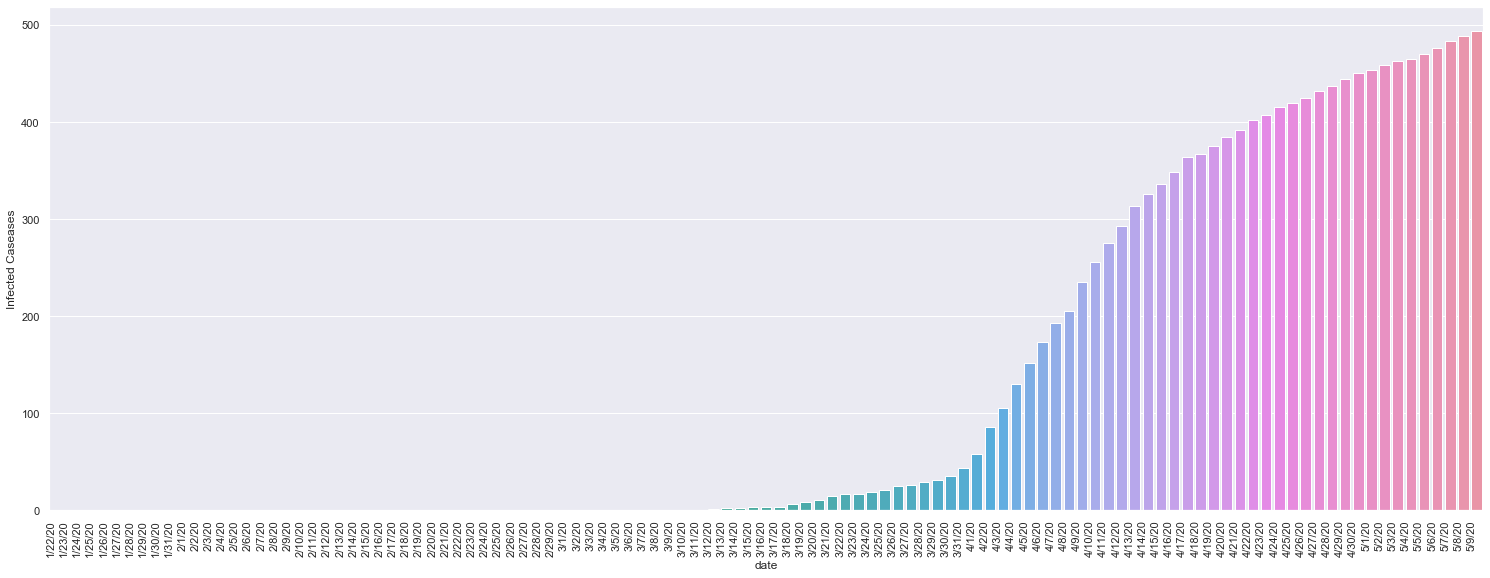

In [14]:
def plot_data(Countryname, countrydata):
    import  seaborn as sns
    sns.set(rc={'figure.figsize':(25.7,9.27)})
    plot = sns.barplot(x="index", y=Countryname, data=countrydata)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')
    plot.set(xlabel='date', ylabel='Infected Caseases')
    return plot
    
plot_data("Algeria", algeria)

In [15]:
def loadData():
    baseURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
    data = pd.read_csv(baseURL) 
    cordonate = data[["Country/Region","Long", "Lat"]]
    data_date = data.drop(["Province/State","Lat","Long"], axis=1)
    return data, cordonate.set_index("Country/Region"), data_date

data, codonate, data_date = loadData()

def processdata(countryname, data_date):
    data_country = data_date.groupby(data_date["Country/Region"]).max()
    data_country.head()
    return data_country.loc[countryname].to_frame().reset_index()

def plot_data(Countryname, countrydata):
    import  seaborn as sns
    sns.set(rc={'figure.figsize':(25.7,9.27)})
    plot = sns.barplot(x="index", y=Countryname, data=countrydata)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')
    plot.set(xlabel='date', ylabel='Infected Caseases')
    return plot

def process_barplot_countrydata(Countryname, data_date):
    country_data = processdata(Countryname, data_date)
    plot_data(Countryname, country_data)

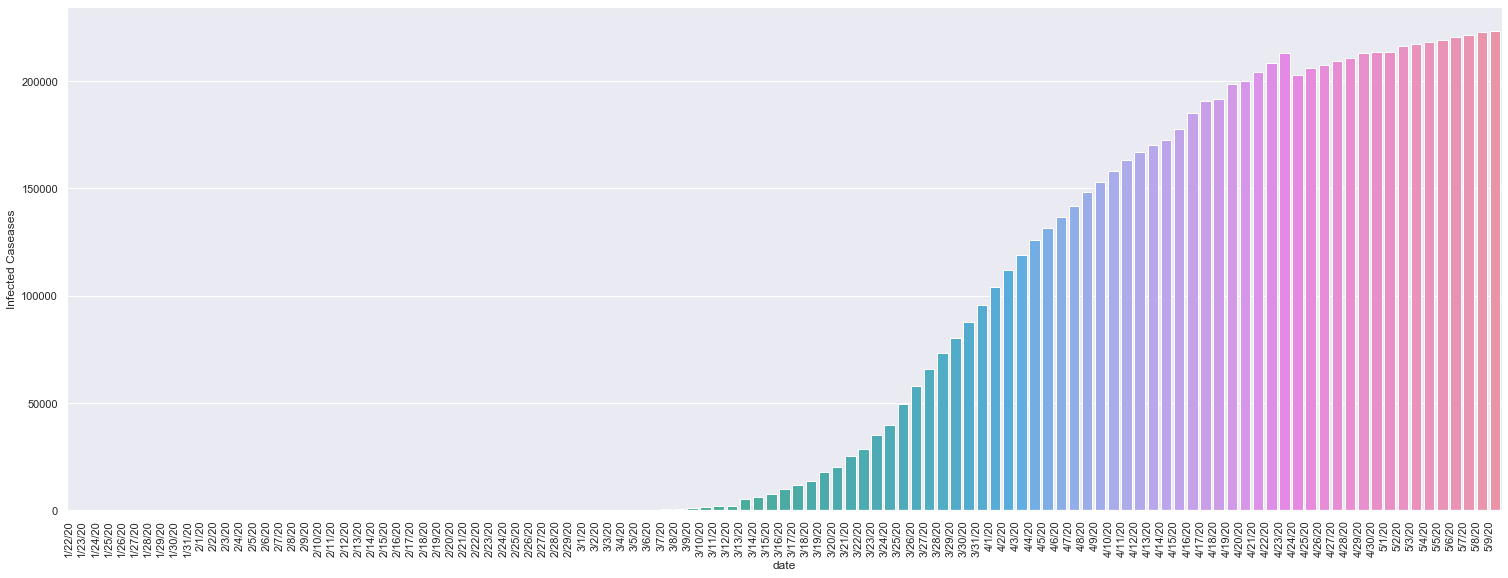

In [16]:
process_barplot_countrydata("Spain", data_date)